In [173]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [142]:
data = pd.read_csv('train (1).csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [10]:
data = pd.read_csv('train (1).csv').drop(columns=['Id', 'Alley', 'Street'] , axis=1)
data.dropna(axis=1, inplace=True)

(1460, 60)

In [11]:
data.shape

(1460, 60)

In [15]:
catogerial_col = list(data.select_dtypes('object'))
catogerial_col

['MSZoning',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [16]:
data.isna().sum()

MSSubClass       0
MSZoning         0
LotArea          0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch 

In [17]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch 

In [18]:
le = LabelEncoder()

In [19]:
data


,MSSubClass,MSZoning,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [22]:
for col in data[catogerial_col]:
    data[col] = le.fit_transform(data[col])

In [23]:
data

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,3,3,0,4,0,5,2,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,3,3,0,2,0,24,1,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,0,3,0,4,0,5,2,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,0,3,0,0,0,6,2,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,0,3,0,2,0,15,2,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,3,3,0,4,0,8,2,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,13175,3,3,0,4,0,14,2,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,9042,3,3,0,4,0,6,2,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,9717,3,3,0,4,0,12,2,...,112,0,0,0,0,4,2010,8,4,142125


In [24]:
data.select_dtypes("object")

""
0
1
2
3
4
...
1455
1456
1457
1458


In [25]:
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,3,3,0,4,0,5,2,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,3,3,0,2,0,24,1,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,0,3,0,4,0,5,2,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,0,3,0,0,0,6,2,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,0,3,0,2,0,15,2,...,0,0,0,0,0,12,2008,8,4,250000


In [32]:
x = data.drop(columns='SalePrice')
y = data['SalePrice']
scale = StandardScaler()
x = scale.fit_transform(x)


(1460, 59)

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [39]:
x_train.shape, x.shape, x_test.shape

((1095, 59), (1460, 59), (365, 59))

In [41]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}

In [101]:
model_RF = RandomForestRegressor(n_estimators=90, random_state=42, max_depth=3)

# param_grid_gb = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'subsample': [0.8, 0.9, 1.0],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

model_GB = GradientBoostingRegressor(n_estimators=90, random_state=42, max_depth=4, max_features='sqrt')
model_svr = SVR(C=100, epsilon=0.5, kernel='linear')
grid_search = GridSearchCV(estimator=model_svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')


In [65]:
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.5],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=2)

In [66]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", -grid_search.best_score_)

Best parameters found:  {'C': 100, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score:  1301423986.1646597


In [102]:
model_RF.fit(x_train,y_train)
model_GB.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=4, max_features='sqrt', n_estimators=90,
                          random_state=42)

In [99]:
model_GB.score(x_train,y_train)

0.9746977284910711

In [100]:
model_GB.score(x_test,y_test)

0.9033805898586084

In [103]:
model_RF.score(x_train,y_train)

0.803536798564104

In [104]:
model_RF.score(x_test,y_test)

0.8099693101644323

In [83]:
model_svr.fit(x_train,y_train)

SVR(C=100, epsilon=0.5, kernel='linear')

In [84]:
model_svr.score(x_train,y_train)

0.802786482715656

In [85]:
model_svr.score(x_test,y_test)

0.8305761731469339

In [89]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [105]:
pred_rf = model_RF.predict(x_test)

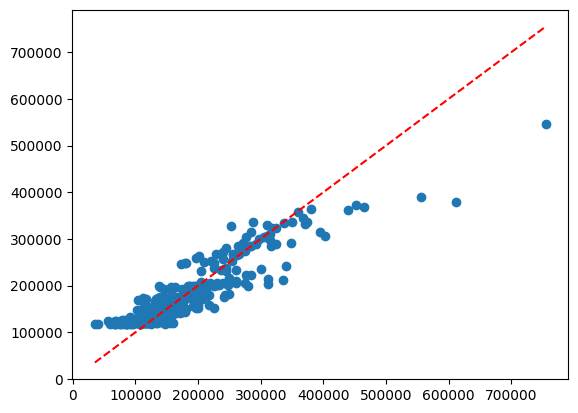

In [135]:
plt.scatter(y_test, pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

In [107]:
pred_gb = model_GB.predict(x_test)

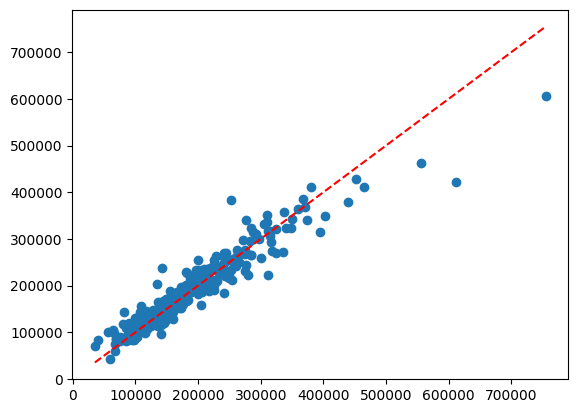

In [169]:
plt.scatter(y_test,pred_gb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

In [174]:
r2_score(y_test,pred_gb)

0.9033805898586084

In [175]:
r2_score(y_test, pred_rf)

0.8099693101644323